<a href="https://colab.research.google.com/gist/gurezende/929c3b17b7055a99b2a77d1a91727929/data_inputation_missingforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sklearn.neighbors

import sys
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from missingpy import MissForest

## Loading the Dataset

In [3]:
# Load dataset tips
df = sns.load_dataset('tips')

In [4]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


As the dataset does not have NAs, I will create some.

In [5]:
# Create an index to create NAs
miss = list(np.random.randint(0,df.shape[0],10))

# Add a new column with NaN
df['size_nan'] = [val if ind not in miss else np.nan for ind, val in enumerate(df['size'])]

In [6]:
# Checking for missing values
df.isnull().sum()

total_bill     0
tip            0
sex            0
smoker         0
day            0
time           0
size           0
size_nan      10
dtype: int64

## Applying Missing Forest

First, let’s create an instance of the missing forest class.

In [7]:
# Instatiate Missing Forest
imputer = MissForest()

Next, we need to remove the categorical variables or One-Hot-Encode them, as missingpy works with numbers. In this example, we’re going with the easy step and drop the categorical variables.

In [8]:
# Dropping size true values
X = df.drop(['sex', 'smoker', 'day', 'time', 'size'], axis=1)

In [9]:
X[X.size_nan.isnull()]

,total_bill,tip,size_nan
18,16.97,3.50,NaN
27,12.69,2.00,NaN
35,24.06,3.60,NaN
97,12.03,1.50,NaN
119,24.08,2.92,NaN
129,22.82,2.18,NaN
159,16.49,2.00,NaN
169,10.63,2.00,NaN
170,50.81,10.00,NaN
204,20.53,4.00,NaN


In [10]:
# Fit and transform the data
X_fit = imputer.fit_transform(X)

C:\Users\roija\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\roija\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Iteration: 0
Iteration: 1
Iteration: 2


C:\Users\roija\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Here is a sample of the output

In [11]:
X_fit[0:10]

array([[16.99,  1.01,  2.  ],
       [10.34,  1.66,  3.  ],
       [21.01,  3.5 ,  3.  ],
       [23.68,  3.31,  2.  ],
       [24.59,  3.61,  4.  ],
       [25.29,  4.71,  4.  ],
       [ 8.77,  2.  ,  2.  ],
       [26.88,  3.12,  4.  ],
       [15.04,  1.96,  2.  ],
       [14.78,  3.23,  2.  ]])

Next, I will replace the col with the NAs with inputted column. 
Notice that I am getting the index 2 (third column), since the X had only three columns (total_bill, tip and size_nan)


In [12]:
# Replace the column NAs with the inputted one
df['size_nan'] = pd.DataFrame(X_fit)[2].round(1).astype('int')

## Let's Evaluate the Results

In [13]:
# NAs 
ind = X[X.size_nan.isnull()].index.to_list()

In [14]:
# Comparison
df.loc[ind,['size', 'size_nan']]

,size,size_nan
18,3,2
27,2,2
35,3,3
97,2,2
119,4,2
129,3,2
159,4,2
169,2,2
170,3,4
204,4,2


And here’s the density distribution of the variable. See that the inputted values almost didn’t change the density plot.

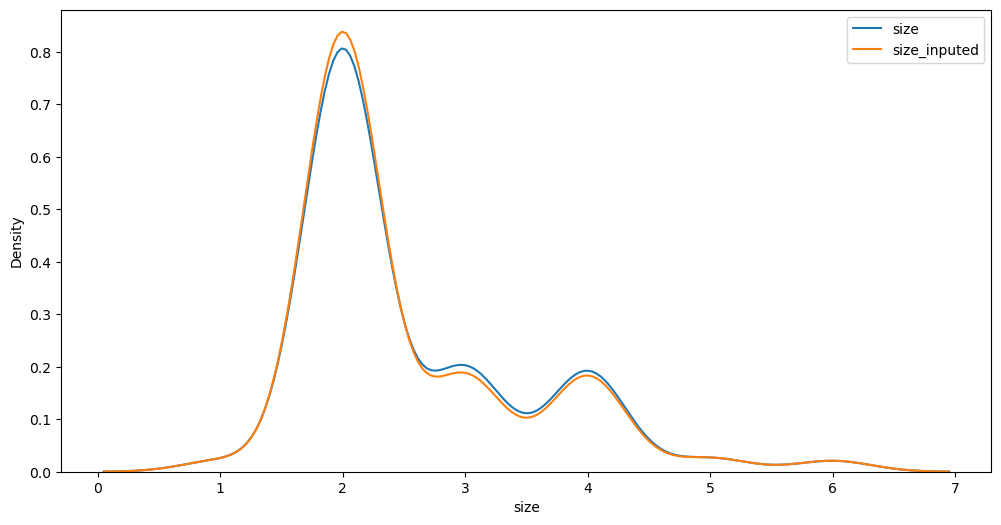

In [15]:
plt.figure(figsize=(12,6))
sns.kdeplot(df['size'], label='size', legend=True)
sns.kdeplot(df['size_nan'], label='size_inputed', legend=True)
plt.legend();

In [16]:
# Stats
df[['size', 'size_nan']].describe().T

,count,mean,std,min,25%,50%,75%,max
size,244.0,2.569672,0.951100,1.0,2.0,2.0,3.0,6.0
size_nan,244.0,2.540984,0.944096,1.0,2.0,2.0,3.0,6.0
